# 🛳️ Análisis Exploratorio de Datos (EDA) – Dataset Titanic de Seaborn

Este proyecto forma parte de mi serie de **proyectos personales de ciencia de datos**, cuyo objetivo es aplicar técnicas de análisis exploratorio para comprender mejor datasets reales y accesibles.

En este caso, utilizo el dataset `titanic` provisto por la librería `Seaborn`, que contiene información sobre los pasajeros del Titanic y su supervivencia, con el fin de explorar patrones y relaciones entre las variables.

## 📌 Objetivos del proyecto

- Cargar y explorar el dataset `titanic` de Seaborn
- Analizar la distribución de las variables principales
- Identificar relaciones significativas entre características y la variable objetivo (`survived`)
- Visualizar los datos de forma clara y efectiva usando `Seaborn` y `Matplotlib`

## 🧰 Herramientas utilizadas

- Python 3.12
- Pandas
- NumPy
- Matplotlib
- Seaborn

> 🔗 Repositorio en [GitHub](https://github.com/jFet1/Proyectos_personales)


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import missingno as msno

## 📊 Medidas de tendencia central en variables numéricas

Antes de adentrarnos en el análisis profundo del dataset, es útil observar cómo se distribuyen algunas variables clave a través de sus **medidas de tendencia central**: **media**, **mediana** y **moda**.

Estas tres estadísticas nos permiten comprender la forma general de los datos y detectar posibles sesgos, asimetrías o valores atípicos.

En esta sección visualizamos la distribución de tres variables numéricas relevantes del dataset del Titanic:

- `age` (edad de los pasajeros)
- `fare` (costo del pasaje)
- `sibsp` (cantidad de familiares a bordo, hermanos/esposos)

En cada gráfico se destacan:
- **Moda**: línea naranja punteada
- **Media**: línea roja punteada
- **Mediana**: línea verde punteada


In [19]:
titanic_df = sns.load_dataset('titanic')
titanic_df.head()

(891, 15)

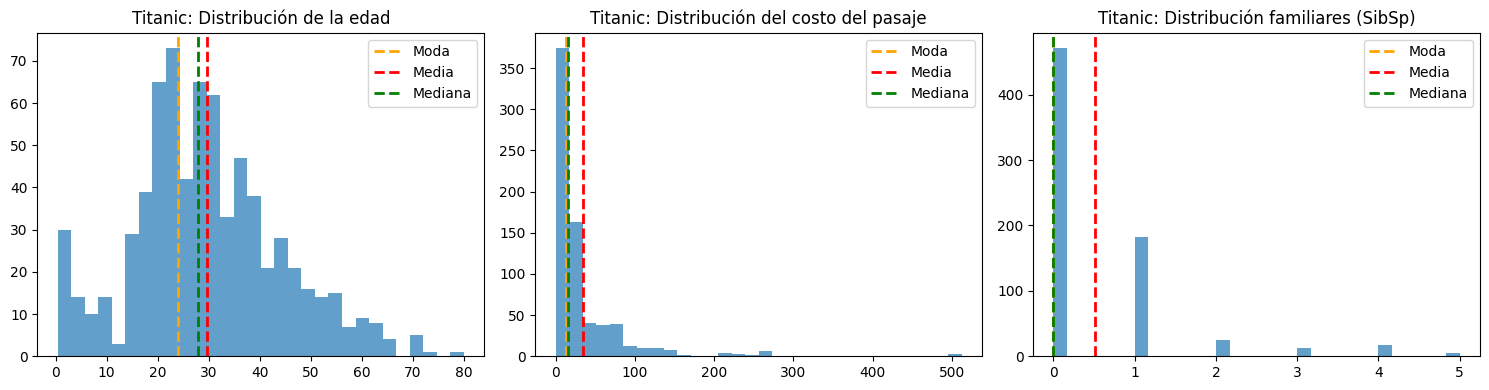

In [ ]:
titanic_df_reduced = titanic_df[['age', 'fare', 'sibsp']].dropna()

fig, axes = plt.subplots(1, 3, figsize=(15, 4))


def plot_distribution(ax: np.ndarray, data: pd.DataFrame, title: str) -> None:
    ax.hist(data, bins=30, alpha=0.7)
    ax.axvline(data.mode()[0], color='orange', linestyle='dashed',
               linewidth=2, label='Moda')
    ax.axvline(data.mean(), color='red', linestyle='dashed',
               linewidth=2, label='Media')
    ax.axvline(data.median(), color='green', linestyle='dashed',
               linewidth=2, label='Mediana')
    ax.set_title(title)
    ax.legend()


plot_distribution(axes[0], titanic_df_reduced['age'],
                  'Titanic: Distribución de la edad')
plot_distribution(axes[1], titanic_df_reduced['fare'],
                  'Titanic: Distribución del costo del pasaje')
plot_distribution(axes[2], titanic_df_reduced['sibsp'],
                  'Titanic: Distribución familiares (SibSp)')

plt.tight_layout()
plt.show()

## 🧠 Conclusiones preliminares

- **Edad (`age`)**: presenta una distribución aproximadamente normal, aunque con una ligera asimetría hacia la derecha (cola larga de personas mayores). La moda está cerca de los 20 años, lo cual puede reflejar un gran número de jóvenes a bordo.
  
- **Costo del pasaje (`fare`)**: tiene una distribución altamente sesgada a la derecha, con muchos pasajeros que pagaron tarifas bajas y unos pocos que pagaron pasajes muy elevados. La media está claramente influenciada por estos valores extremos, alejándose mucho de la mediana y la moda.

- **Familiares a bordo (`sibsp`)**: está fuertemente concentrada en el valor 0, lo que indica que la mayoría de los pasajeros viajaban sin hermanos/as o esposos/as. La media es mayor que la mediana y la moda, lo que también refleja una distribución asimétrica.

Estas visualizaciones nos ayudan a identificar qué variables tienen distribuciones balanceadas y cuáles podrían necesitar transformaciones (como logaritmos) para futuros modelos predictivos.


---

## 🧩 Análisis y tratamiento de valores faltantes

Un paso fundamental en cualquier análisis exploratorio es la detección y el tratamiento de valores faltantes. La presencia de datos nulos puede distorsionar las estadísticas, afectar las visualizaciones y generar errores en modelos predictivos si no se maneja adecuadamente.

En esta sección se identifican las variables con datos ausentes en el dataset `titanic` de Seaborn, evaluando su proporción relativa y considerando estrategias de imputación o descarte según el caso.

El objetivo es garantizar que el conjunto de datos esté limpio y preparado para los siguientes pasos del análisis sin comprometer su integridad.


Valores faltantes por columna:
deck           688
age            177
embarked         2
embark_town      2
dtype: int64


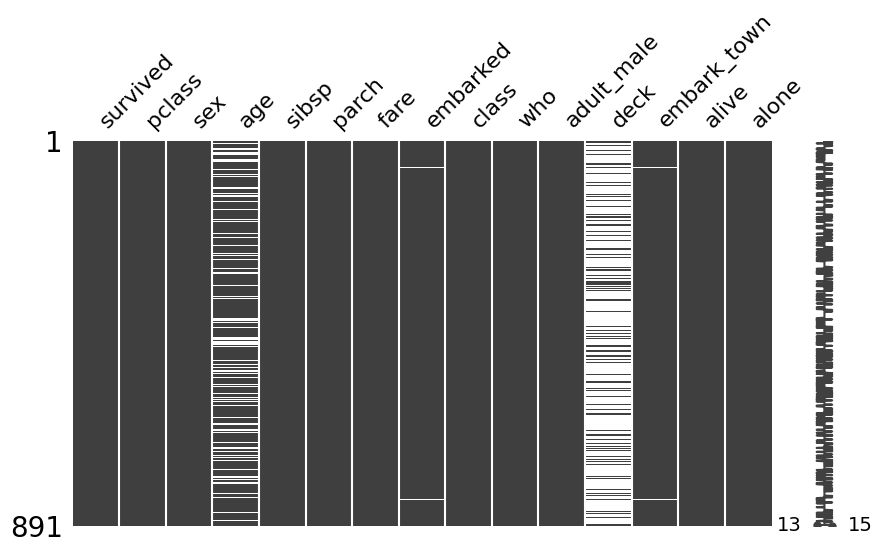

In [22]:
# Cantidad de nulos por columna
missing_counts = titanic_df.isnull().sum()
missing_counts = missing_counts[missing_counts > 0].sort_values(ascending=False)

# Mostrar resultado
print("Valores faltantes por columna:")
print(missing_counts)

# Visualización gráfica
msno.matrix(titanic_df, figsize=(10, 5))
plt.show()


## 🧠 Conclusiones sobre los valores faltantes

Del análisis de valores faltantes se observa lo siguiente:

- **`deck`** presenta una gran cantidad de valores ausentes (688 sobre 891), lo que representa más del 77% del total. Debido a esta alta proporción, su utilidad analítica es limitada y posiblemente se descarte del análisis principal.
- **`age`** tiene 177 valores faltantes (cerca del 20%), pero al ser una variable numérica clave para el análisis (especialmente en relación con la supervivencia), se intentará **imputar estos valores** con alguna medida estadística (como la mediana), o estimaciones basadas en otras variables.
- **`embarked`** y **`embark_town`** presentan solo 2 valores faltantes cada una. Dado el bajo impacto, se podrán imputar fácilmente con la moda u otra técnica simple.

A partir de estos resultados, se procederá a aplicar técnicas de **completado de datos** priorizando la imputación estadística o contextual. La eliminación de filas solo se considerará como último recurso en los casos donde no sea posible una imputación confiable.



In [26]:
# Filtrar las filas donde falta la edad
datos_age_null = titanic_df[titanic_df['age'].isnull()]

# Ver resumen estadístico de esas filas
print("Descripción de los datos con edad faltante:")
display(datos_age_null.describe(include='all'))

# Ver la distribución de la clase (pclass) en esos casos
print("Distribución de pclass en los registros con edad faltante:")
print(datos_age_null['pclass'].value_counts())


Descripción de los datos con edad faltante:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,177.000000,177.000000,177,0.0,177.000000,177.000000,177.000000,177,177,177,177,19,177,177,177
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,2,2,6,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,124,NaN,NaN,NaN,NaN,90,136,124,124,8,90,125,133
mean,0.293785,2.598870,NaN,NaN,0.564972,0.180791,22.158567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.456787,0.763216,NaN,NaN,1.626316,0.534145,31.874608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,3.000000,NaN,NaN,0.000000,0.000000,7.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,0.000000,0.000000,8.050000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,0.000000,0.000000,24.150000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Distribución de pclass en los registros con edad faltante:
pclass
3    136
1     30
2     11
Name: count, dtype: int64


## 🔍 Exploración del patrón de datos faltantes en `age`

En lugar de asumir que los valores nulos en la variable `age` son completamente aleatorios, se exploraron las características de las observaciones que carecen de este dato. Específicamente, se analizaron los pasajeros cuya edad no está registrada.

Al observar la distribución de la variable `pclass` en estos casos, se encontró lo siguiente:

- La mayoría de los pasajeros sin información de edad pertenecen a la **tercera clase (pclass = 3)**, con un total de 136 registros sobre 177.
- Las clases primera y segunda tienen significativamente menos casos de edad faltante (30 y 11 respectivamente).

Este hallazgo sugiere que la falta de edad **no es completamente aleatoria**, sino que podría estar relacionada con la condición socioeconómica del pasajero (por ejemplo, menor registro de datos en pasajeros de tercera clase).

Este patrón es indicativo de un posible mecanismo **MNAR** (*Missing Not At Random*), donde la ausencia del dato está relacionada con variables no observadas o con el mismo valor faltante. Por tanto, la imputación de `age` debe considerar variables como `pclass`, `sex`, o `sibsp` para estimar valores más realistas.


In [29]:
def impute_age_by_group(df: pd.DataFrame) -> pd.DataFrame:
    """
    Imputa los valores faltantes de 'age' usando la mediana entera
    de grupos definidos por 'pclass', 'sex' y 'sibsp'.
    Si no hay datos suficientes en el grupo, se usa la mediana general del dataset.

    Parámetros:
    - df: DataFrame con las columnas 'age', 'pclass', 'sex', 'sibsp'

    Retorna:
    - DataFrame con la columna 'age' imputada como enteros (nullable)
    """
    df_copy: pd.DataFrame = df.copy()
    global_median: float = df['age'].median()

    def estimate_age(row: pd.Series) -> int:
        if pd.isnull(row['age']):
            group = df[
                (df['pclass'] == row['pclass']) &
                (df['sex'] == row['sex']) &
                (df['sibsp'] == row['sibsp'])
            ]['age'].dropna()

            if len(group) > 0:
                return int(round(group.median()))
            else:
                return int(round(global_median))
        else:
            return int(round(row['age']))

    df_copy['age'] = df_copy.apply(estimate_age, axis=1).astype('Int64')
    return df_copy


titanic_df_imputed = impute_age_by_group(titanic_df)

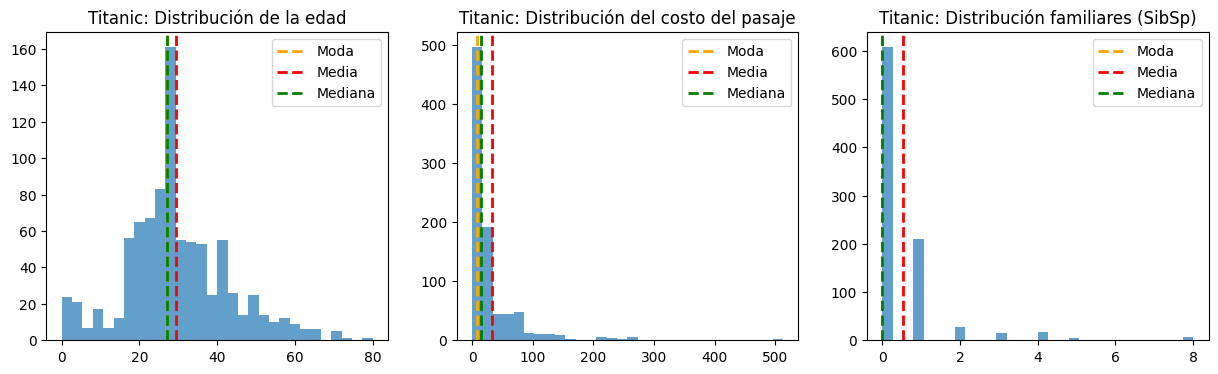

In [30]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))


plot_distribution(axes[0], titanic_df_imputed['age'],
                  'Titanic: Distribución de la edad')
plot_distribution(axes[1], titanic_df_imputed['fare'],
                  'Titanic: Distribución del costo del pasaje')
plot_distribution(axes[2], titanic_df_imputed['sibsp'],
                  'Titanic: Distribución familiares (SibSp)')